In [133]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statistics
from numpy.linalg import inv

In [127]:
# each row has two values which are seperated by a space
data = pd.read_csv('data.txt', delimiter=' ', header=None)

In [128]:
data.columns = ['x', 'y']

In [129]:
data.head()

,x,y
0,0.005,0.3843
1,0.010,0.5689
2,0.015,0.8537
3,0.020,0.7009
4,0.025,0.9686


In [24]:
data['x'].describe()

count    2000.000000
mean        5.002500
std         2.887473
min         0.005000
25%         2.503750
50%         5.002500
75%         7.501250
max        10.000000
Name: x, dtype: float64

In [153]:
x = np.array(data['x'])
Y = np.array(data['y'])

In [223]:
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.2, shuffle=True)

preview the trend of training data

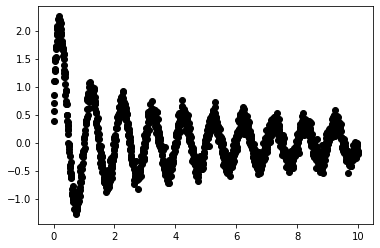

In [155]:
plt.plot(x_train, Y_train, 'o', color='black')

In [228]:
def Gaussian_basic_function_v2(data):
    data_list = []
    mean_list = np.arange(0.5, 10, 1)
    variance = 0.5
    for miu in mean_list:
        gaussian = np.exp(-(data-miu)**2/(2*variance))
        print(gaussian.shape)
        data_list.append(gaussian)
    # 10 times 1600
    return np.array(data_list)

In [156]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [157]:
def Gaussian_basic_function(data):
    miu = statistics.mean(data)
    variance = statistics.variance(data)
    return np.exp(-(data-miu)**2/(2*variance))

In [158]:
def Sigmoid_basic_function(data):
    miu = statistics.mean(data)
    variance = statistics.variance(data)
    return sigmoid((data-miu)/np.sqrt(variance))

In [206]:
def Polynomial_basic_function(data, degree):
    li = []
    for i in range(1, degree+1):
        li.append(data**i)
    return np.transpose(li)

In [160]:
def plot_loss_curve(loss_list,title='Loss during training',loss_curve_save_path=None):
    plt.plot(loss_list)
    plt.title(title)
    plt.xlabel('Iteration')
    plt.ylabel('MSE')
    if loss_curve_save_path:
        plt.savefig('{}.png'.format(loss_curve_save_path), dpi=120)
    # show the loss curve
    # every point shows the loss of one batch
    plt.show()

In [161]:
def plot_validation_result(y_true, y_predicted, label='Validation', validation_save_path=None):  
    plt.plot(y_true, y_predicted, 'co', label=label, alpha=0.3)
    plt.plot(y_true, y_true, 'r--', label='y = x', alpha=0.5)
    plt.xlabel('True')
    plt.ylabel('Predictions')
    plt.legend(loc='best')
    if validation_save_path:
        plt.savefig('{}.png'.format(validation_save_path), dpi=120)
    plt.show()

use Gaussian basic function

In [162]:
gaussian = Gaussian_basic_function(x_train)

Use sigmoid basic function

In [164]:
sig = Sigmoid_basic_function(x_train)

polynomial function

In [60]:
poly = Polynomial_basic_function(x_train, 8)
poly = np.sum(poly, axis=1)

In [ ]:
# add basic function

In [166]:
x_train = np.array([np.ones_like(x_train), Sigmoid_basic_function(x_train)]).T

In [167]:
x_test = np.array([np.ones_like(x_test), Sigmoid_basic_function(x_test)]).T

In [178]:
iteration_time = 100
learning_rate = 0.0001
# first is bais second is weight
w = np.array([0,1])
train_error_list = []
test_error_list = []

1. batch gradient descent algorithm implementation

In [179]:
for i in range(iteration_time):
    y_predict = np.matmul(x_train, w)
    # calculate mean square error
    diff = Y_train - y_predict
    mse = (1/2)*(diff**2).mean()
    # mean square error
#     rmse = np.sqrt(mse)
    train_error_list.append(mse)
    # backpropogation
#     gradient = (1/2) * (me ** (-1/2)) * np.matmul(x_train.T, -diff)
    gradient = np.matmul(x_train.T, -diff) / len(x_train)
    # update weight
    w = w - learning_rate * gradient
    # evaluate
    y_test_predict = np.matmul(x_test, w)
    test_error = np.sqrt(((y_test_predict - Y_test)**2).mean())
    test_error_list.append(test_error)
#     print('{} iteration, training MSE: {:.4f}, test MSE: {:.4f}'.format(i+1, mse, test_error))

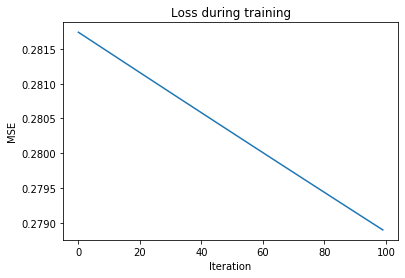

In [180]:
plot_loss_curve(train_error_list)

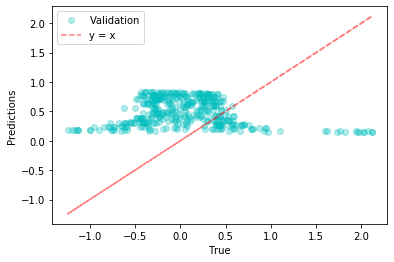

In [181]:
plot_validation_result(Y_test, y_test_predict)

In [204]:
w

array([-0.00449328,  0.99707972])

In [186]:
test_error

0.7522656906252084

2. stochastic gradient descent 

In [188]:
w_1 = np.array([0,1])
train_error_list_1 = []
test_error_list_1 = []

In [194]:
# 3200
for i in range(len(x_train)):
    y_predict = np.matmul(x_train[i], w_1)
    # calculate mean square error
    diff = Y_train[i] - y_predict
    mse = (1/2)*(diff**2).mean()
    # mean square error
#     mse = np.square(me)
    train_error_list_1.append(mse)
    # backpropogation
#     gradient = (1/2) * (me ** (-1/2)) * np.matmul(x_train.T, -diff)
    gradient = x_train[i].T * (-diff)
    # update weight
    w_1 = w_1 - learning_rate * gradient
    # evaluate
    y_test_predict_1 = np.matmul(x_test, w_1)
    test_error_1 = np.sqrt(((y_test_predict_1 - Y_test)**2).mean())
    test_error_list_1.append(test_error_1)
#     print('{} iteration, training MSE: {:.4f}, test MSE: {:.4f}'.format(i+1, mse, test_error))

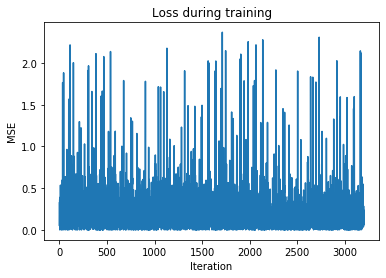

In [195]:
plot_loss_curve(train_error_list_1)

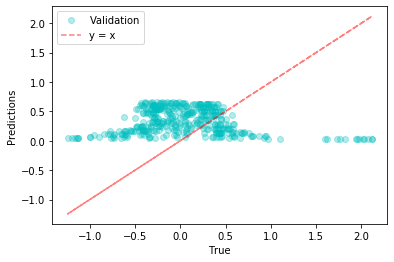

In [197]:
plot_validation_result(Y_test, y_test_predict_1)

In [205]:
w_1

array([-0.11785002,  0.92009463])

In [198]:
test_error_1

0.6658408906444364

3. maximum likelihood

In [199]:
weights = np.matmul(np.matmul(inv(np.matmul(x_train.T, x_train)), x_train.T), Y_train)

In [200]:
weights

array([ 0.24984276, -0.4039716 ])

In [201]:
y_test_predict_2 = np.matmul(x_test, weights)
test_error_2 = np.sqrt(((y_test_predict_2 - Y_test)**2).mean())

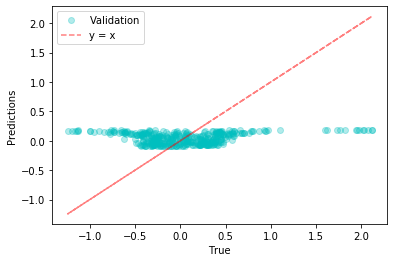

In [202]:
plot_validation_result(Y_test, y_test_predict_2)

In [203]:
test_error_2

0.5260240040242716

In [120]:
# parameters
w0 = 0
w1 = 1
gama = 1
beta = 1
bias = 0

In [121]:
# 3200
for j in range(1):
    for i in range(len(x_train)):
        y_predict = w1 * np.exp(gama * x_train) * np.sin(beta * x_train + bias)
        # calculate mean square error
        diff = Y_train - y_predict
        me = (1/2)*(diff**2).mean()
        print(me)
        # mean square error
        mse = np.square(me)
        print(mse)
#         print(mse)
        train_error_list.append(mse)

        w1_gradient = np.matmul((np.exp(gama * x_train) * np.sin(beta * x_train + bias)).T, -diff)
        gama_gradient = np.matmul((w1 * np.exp(gama * x_train) * np.sin(beta * x_train + bias) * x_train[i]).T, -diff)
        beta_gradient = np.matmul((w1 * np.exp(gama * x_train) * np.cos(beta * x_train + bias) * x_train[i]).T, -diff)
        bias_gradient = np.matmul((w1 * np.exp(gama * x_train) * np.cos(beta * x_train + bias)).T, -diff)
#         w0_gradient = -diff

        # update weight
#         w0 = w0 - learning_rate * w0_gradient
        w1 = w1 - learning_rate * w1_gradient
        gama = gama - learning_rate * gama_gradient
        beta = beta - learning_rate * beta_gradient
        bias = bias - learning_rate * bias_gradient
        print(w1, gama, beta, bias)
#         

2159157.819876693
4661962491134.675
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.13317

0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.13317999

0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.13317999

0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.13317999

0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.13317999

0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.13317999

-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.02

-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.02

0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.13317999

-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.02

-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.02

-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.02

0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.133179995
0.017736911068200023
-690941.0202938223 -2090098.611388813 -1740590.4273695138 -575402.1247502526
0.13317999

In [ ]:
# 3200
for j in range(1):
    for i in range(len(x_train)):
        y_predict = w1 * np.exp(gama * x_train[i]) * np.sin(beta * x_train[i] + bias) + w0
        # calculate mean square error
        diff = Y_train[i] - y_predict
        print(diff)
        me = (1/2)*(diff**2).mean()
        # mean square error
        mse = np.square(me)
#         print(mse)
        train_error_list.append(mse)

        w1_gradient = np.exp(gama * x_train[i]) * np.sin(beta * x_train[i] + bias) * (-diff)
        gama_gradient = w1 * np.exp(gama * x_train[i]) * np.sin(beta * x_train[i] + bias) * x_train[i] * (-diff)
        beta_gradient = w1 * np.exp(gama * x_train[i]) * np.cos(beta * x_train[i] + bias) * x_train[i] * (-diff)
        bias_gradient = w1 * np.exp(gama * x_train[i]) * np.cos(beta * x_train[i] + bias) * (-diff)
        w0_gradient = -diff

        # update weight
        w0 = w0 - learning_rate * w0_gradient
        w1 = w1 - learning_rate * w1_gradient
        gama = gama - learning_rate * gama_gradient
        beta = beta - learning_rate * beta_gradient
        bias = bias - learning_rate * bias_gradient
#         print(w0, w1, gama, beta, bias)